In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime as dt
import yfinance as yf
# %matplotlib widget

BETA = covariance / variance

In [2]:
start = dt.datetime(2020, 10, 20)

simbol1 = "SPY"
simbol2 = "COF"
ticker1 = yf.Ticker(simbol1)
ticker2 = yf.Ticker(simbol2)
stock_data1 = ticker1.history(start=start, actions=False, rounding=True)
stock_data2 = ticker2.history(start=start, actions=False, rounding=True)

In [3]:
stock_data = pd.concat([stock_data1.Close, stock_data2.Close], axis=1)

In [4]:
stock_data.columns = [simbol1,simbol2]

In [5]:
stock_data.tail(2)

,SPY,COF
Date,,
2024-01-25 00:00:00-05:00,488.03,132.55
2024-01-26 00:00:00-05:00,487.25,138.73


In [6]:
close_data_pct = np.log(stock_data/stock_data.shift())

In [7]:
close_data_pct.tail(2)

,SPY,COF
Date,,
2024-01-25 00:00:00-05:00,0.005424,0.011076
2024-01-26 00:00:00-05:00,-0.001600,0.045570


In [8]:
covariance = close_data_pct.cov().iloc[0,1]
covariance

0.00015630015595349193

In [9]:
variance = close_data_pct["SPY"].var()
variance

0.00011973607121274376

In [10]:
BETA = covariance/variance
BETA

1.3053723441099225

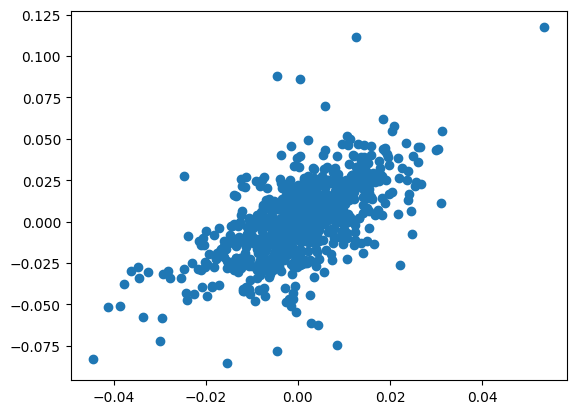

In [11]:
fig1, ax1 = plt.subplots()
ax1.scatter(close_data_pct.SPY, close_data_pct.COF);

Linear regression:

In [12]:
X = close_data_pct['SPY'].iloc[1:].values.reshape(-1,1)
Y = close_data_pct['COF'].iloc[1:].values.reshape(-1,1)

regression = linear_model.LinearRegression()
regression.fit(X,Y)
regression.coef_
# regression coeficient value is the same as beta value

array([[1.30537234]])